In [1]:
# Bütün yorum veri setlerini kullanarak yorumları sadeleştirme işlemi

In [2]:
import os 
os.listdir('HB_Yorumlar')

['.ipynb_checkpoints',
 'hb_yorumlar6.csv',
 'hb_yorumlar3.csv',
 'yorumAlma4.ipynb',
 'hb_yorumlar8.csv',
 'urunler.txt',
 'hb_yorumlar9.csv',
 'hb_yorumlar4.csv',
 'yorumAlma9.ipynb',
 'hb_yorumlar5.csv',
 'yorumAlma5.ipynb',
 'yorumAlma8.ipynb',
 'hb_yorumlar2.csv',
 'yorumAlma3.ipynb',
 'hb_yorumlar7.csv',
 'yorumAlma2.ipynb',
 'hb_yorumlar1.csv',
 'yorumAlma.ipynb',
 'yorumAlma7.ipynb',
 'yorumAlma6.ipynb',
 'hb_yorumlar10.csv',
 'yorumAlma10.ipynb']

In [3]:
for i in os.listdir('HB_Yorumlar'):
    if i.endswith('.csv'):
        print(i)

hb_yorumlar6.csv
hb_yorumlar3.csv
hb_yorumlar8.csv
hb_yorumlar9.csv
hb_yorumlar4.csv
hb_yorumlar5.csv
hb_yorumlar2.csv
hb_yorumlar7.csv
hb_yorumlar1.csv
hb_yorumlar10.csv


In [4]:
def toplamYorumlar(data):
    import pandas as pd
    df = pd.read_csv(f'HB_Yorumlar/{data}', sep = ',')
    yorumSayisi = df.shape[0]
    return yorumSayisi

In [5]:
toplamYorumSayisi = 0
for i in os.listdir('HB_Yorumlar'):
    if i.endswith('.csv'):
        yorumSayisi = toplamYorumlar(i)
        toplamYorumSayisi += yorumSayisi
        print(f'{i} veri setinin yorum sayısı: {yorumSayisi}')
print(f'Toplam yorum sayısı: {toplamYorumSayisi}')

hb_yorumlar6.csv veri setinin yorum sayısı: 4012
hb_yorumlar3.csv veri setinin yorum sayısı: 1738
hb_yorumlar8.csv veri setinin yorum sayısı: 4365
hb_yorumlar9.csv veri setinin yorum sayısı: 3400
hb_yorumlar4.csv veri setinin yorum sayısı: 3311
hb_yorumlar5.csv veri setinin yorum sayısı: 3839
hb_yorumlar2.csv veri setinin yorum sayısı: 2862
hb_yorumlar7.csv veri setinin yorum sayısı: 3919
hb_yorumlar1.csv veri setinin yorum sayısı: 3631
hb_yorumlar10.csv veri setinin yorum sayısı: 2990
Toplam yorum sayısı: 34067


In [6]:
# tüm veri setleri birlestirme islemi
import pandas as pd
allDataSet = pd.DataFrame()
for i in os.listdir('HB_Yorumlar'):
    if i.endswith('.csv') and i.startswith('hb'):
        data = pd.read_csv(f'HB_Yorumlar/{i}')
        allDataSet = pd.concat([allDataSet, data], ignore_index = True)

In [7]:
allDataSet

,tarih,puan,yorum
0,2021-10-19,5,Renkli çıktı da renkler gayet canlı çıkıyor. K...
1,2021-09-12,5,Ürün ile birlikte gelen evraklar ile kurulumu ...
2,2021-12-23,5,Çok iyi bir yazıcı kurulumu mürekkebi koyması ...
3,2022-03-19,5,Kablosuz bağlantısı ile telefondan çikti ları ...
4,2022-03-19,5,Kurulumu basit ve hızlı.Güzel tasarım.Kullanım...
...,...,...,...
34062,2022-03-23,5,üründen memnun kaldım gayet iyi kargo paketlem...
34063,2022-03-22,5,Ürün güzel paketleme gayet iyiydi kutuların ol...
34064,2022-03-17,5,"Gayet özenle paketlenmişti, hızlı teslimat. Bi..."
34065,2022-05-09,5,Harika bir bilgisayar. Hızlıca teknik destek a...


In [8]:
allDataSet.to_csv('butunYorumlar.csv', sep = ',', encoding = 'utf-8', index = False)

In [12]:
def sadelestirme(dataSet):
    
    import pandas as pd
    from nltk.corpus import stopwords
    
    import warnings
    warnings.simplefilter(action='ignore', category=FutureWarning)
    warnings.filterwarnings('ignore', category = UserWarning)
    
    data = pd.read_csv(f'{dataSet}', sep = ',')
    
    df = pd.DataFrame(data['yorum'])
    
    # büyük-kücük harf dönüsümü
    df['yorum'] = df['yorum'].apply(lambda x: ' '.join(i.lower() for i in x.split()))
    
    # noktalama ve sayıların silinmesi
    df['yorum'] = df['yorum'].str.replace(r'[^\w\s]', '')
    df['yorum'] = df['yorum'].str.replace('\d', '')
    
    # stopwordsların silinmesi
    sw = stopwords.words('turkish')
    df['yorum'] = df['yorum'].apply(lambda x: ' '.join(i for i in x.split() if i not in sw))
    
    # cöp kelimelerin silinmesi
    sil = pd.Series(' '.join(df['yorum']).split()).value_counts()[-20000:] #sondan 20000
    df['yorum'] = df['yorum'].apply(lambda x: ' '.join(i for i in x.split() if i not in sil))
        
    data['yeni_yorum'] = df['yorum']
    return data

In [13]:
newData = sadelestirme('butunYorumlar.csv')

In [14]:
newData

,tarih,puan,yorum,yeni_yorum
0,2021-10-19,5,Renkli çıktı da renkler gayet canlı çıkıyor. K...,renkli çıktı renkler gayet canlı çıkıyor kutu ...
1,2021-09-12,5,Ürün ile birlikte gelen evraklar ile kurulumu ...,ürün birlikte gelen evraklar kurulumu basit ko...
2,2021-12-23,5,Çok iyi bir yazıcı kurulumu mürekkebi koyması ...,iyi bir yazıcı kurulumu mürekkebi koyması kola...
3,2022-03-19,5,Kablosuz bağlantısı ile telefondan çikti ları ...,kablosuz bağlantısı telefondan çikti ları alab...
4,2022-03-19,5,Kurulumu basit ve hızlı.Güzel tasarım.Kullanım...,kurulumu basit hızlıgüzel tasarımkullanımı kol...
...,...,...,...,...
34062,2022-03-23,5,üründen memnun kaldım gayet iyi kargo paketlem...,üründen memnun kaldım gayet iyi kargo paketlem...
34063,2022-03-22,5,Ürün güzel paketleme gayet iyiydi kutuların ol...,ürün güzel paketleme gayet iyiydi kutuların ol...
34064,2022-03-17,5,"Gayet özenle paketlenmişti, hızlı teslimat. Bi...",gayet özenle paketlenmişti hızlı teslimat kura...
34065,2022-05-09,5,Harika bir bilgisayar. Hızlıca teknik destek a...,harika bir bilgisayar hızlıca teknik destek al...


In [15]:
newData.to_csv('butunYorumlarSon.csv')

In [16]:
newData.iloc[200:210, 2:4].values

array([['Orjinal ürün, gayet hzlı kargo, teşekkürler.',
        'orjinal ürün gayet hzlı kargo teşekkürler'],
       ['Yok tamamı dolu değil falan boş şeyler bunlar bu satıcıdan 8 kere sipariş verdim birinde bile sorun yaşamadım.Tam dolu kartuş ve hızlı teslimat teşekkürler',
        'yok tamamı dolu değil falan boş şeyler bunlar satıcıdan kere sipariş verdim birinde bile sorun yaşamadımtam dolu kartuş hızlı teslimat teşekkürler'],
       ['Tam dolu orijinal', 'tam dolu orijinal'],
       ['Akşam 17:04&#039;de sipariş verdim. Sabah 09.56&#039;da geldi. Süper hızlı, başarılı kargo. E474 için aldım, sorunsuz çalışıyor. Tek sorun resimde görüldüğü üzere tam dolu değil (%80).\n\nHepsiburada ve HepsiJET çalışanlarına teşekkür eder,\nyeniyılda sağlıklı günler dilerim.',
        'akşam sipariş verdim sabah geldi süper hızlı başarılı kargo e aldım sorunsuz çalışıyor tek sorun resimde görüldüğü üzere tam dolu değil hepsiburada hepsijet çalışanlarına teşekkür eder yeniyılda sağlıklı günler diler

In [17]:
df = newData.copy()

In [18]:
df['yeni_yorum'].str.len() # yeni yorum harf sayısı

0        291
1        230
2        474
3        212
4        100
        ... 
34062    119
34063    159
34064    168
34065     92
34066     89
Name: yeni_yorum, Length: 34067, dtype: int64

In [19]:
df['yorum'].str.len() # harf sayısı

0        319
1        248
2        529
3        221
4        105
        ... 
34062    123
34063    164
34064    176
34065     94
34066     95
Name: yorum, Length: 34067, dtype: int64

In [21]:
pd.Series(' '.join(df['yeni_yorum']).split()).value_counts() # kelime sıklığı

bir                26013
ürün               12705
güzel              10556
iyi                 9971
gayet               6385
                   ...  
sevdiklerinizin        1
özelleştirip           1
shiftdelete            1
kullanmadın            1
çözeceğimi             1
Length: 56909, dtype: int64

### WordCloud

In [22]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [23]:
text = ' '.join(i for i in df.yorum)

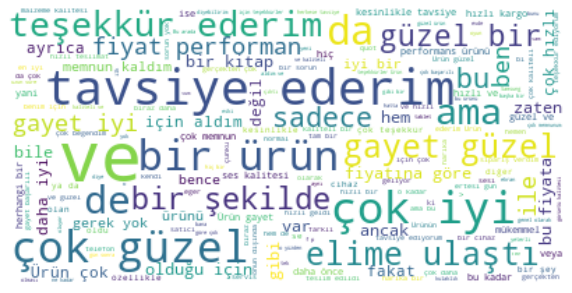

In [24]:
wc = WordCloud(max_font_size = 50,
              background_color = 'white').generate(text)

plt.figure(figsize = [10, 10])
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

### Sentiment Analizi

In [25]:
from textblob import TextBlob
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble

import pandas, xgboost, numpy, textblob, string
from pandas import MultiIndex, Int64Index

import warnings
warnings.filterwarnings(action = 'ignore', category = UserWarning)
warnings.simplefilter(action = 'ignore', category = FutureWarning)

In [26]:
df.head()

,tarih,puan,yorum,yeni_yorum
0,2021-10-19,5,Renkli çıktı da renkler gayet canlı çıkıyor. K...,renkli çıktı renkler gayet canlı çıkıyor kutu ...
1,2021-09-12,5,Ürün ile birlikte gelen evraklar ile kurulumu ...,ürün birlikte gelen evraklar kurulumu basit ko...
2,2021-12-23,5,Çok iyi bir yazıcı kurulumu mürekkebi koyması ...,iyi bir yazıcı kurulumu mürekkebi koyması kola...
3,2022-03-19,5,Kablosuz bağlantısı ile telefondan çikti ları ...,kablosuz bağlantısı telefondan çikti ları alab...
4,2022-03-19,5,Kurulumu basit ve hızlı.Güzel tasarım.Kullanım...,kurulumu basit hızlıgüzel tasarımkullanımı kol...


In [27]:
df.puan.value_counts()

5    28693
4     3402
3      969
1      772
2      231
Name: puan, dtype: int64

In [28]:
df.loc[df['puan'] < 4, 'puan'] = 1
# df.loc[df['puan'] == 4, 'puan'] = 5

In [29]:
df.puan.value_counts()

5    28693
4     3402
1     1972
Name: puan, dtype: int64

In [30]:
df_1 = df[df['puan'] == 1]
df_5 = df[df['puan'] == 5]

In [31]:
df = pd.concat([df_1, df_5], ignore_index = True)

In [32]:
df.puan.value_counts()

5    28693
1     1972
Name: puan, dtype: int64

In [33]:
df['puan'].replace(5, value = 'pozitif', inplace = True)
df['puan'].replace(1, value = 'negatif', inplace = True)

In [34]:
df.puan.value_counts()

pozitif    28693
negatif     1972
Name: puan, dtype: int64

#### Değişken Mühendisliği

In [35]:
df = pd.DataFrame({'text':df['yeni_yorum'], 'label':df['puan']})

In [36]:
df.head()

,text,label
0,ürün orijinal fakat kargo geç geldi,negatif
1,ürünü aldık iyi hoş ta ürün deli kartuş yiyor ...,negatif
2,saniyede fotokopi cekiyor baskıda yatay dikey ...,negatif
3,ürün orijinal fakat kargo geç geldi,negatif
4,siyah kartuş bozuk geldi,negatif


In [37]:
from sklearn.utils import shuffle

In [38]:
df = shuffle(df)
df.head()

,text,label
11449,ürün sağlam bir şekilde elimize ulaştı güzel p...,pozitif
26277,kitap hasarsız hızlı bir şekilde elime ulaştı ...,pozitif
8099,ürün fonksiyonel bir cihaz haftalık günlük pro...,pozitif
6610,paketleme özenliydi renkler canlı içerikler gü...,pozitif
9590,mükemmel kaçıncı alışım hatırlamıyorum bile ke...,pozitif


In [39]:
Xtrain, Xtest, ytrain, ytest = model_selection.train_test_split(df['text'],
                                                               df['label'],
                                                               random_state = 1) 

In [40]:
le = preprocessing.LabelEncoder()
ytrain = le.fit_transform(ytrain)
ytest = le.fit_transform(ytest)

In [41]:
# count vectors
vc = CountVectorizer().fit(Xtrain)
vc

CountVectorizer()

In [42]:
Xtrain_count = vc.transform(Xtrain)
Xtest_count = vc.transform(Xtest)

In [43]:
vc.get_feature_names()[0:20]

['__',
 '_artıları_',
 '_biz',
 '_eksileri_',
 '_her',
 '_migrisşokptt',
 '_temassız',
 'aa',
 'aaa',
 'aaaa',
 'aanca',
 'ab',
 'abalajlanmış',
 'abartabileceğini',
 'abartildigi',
 'abartili',
 'abartmalarıyla',
 'abartmaya',
 'abartmayalım',
 'abartmislar']

In [48]:
# Xtrain_count.toarray()

#### TF-IDF

In [45]:
# word level
tfidf_word_vc = TfidfVectorizer(analyzer = 'word').fit(Xtrain)
Xtrain_tfidf_word = tfidf_word_vc.transform(Xtrain)
Xtest_tfidf_word = tfidf_word_vc.transform(Xtest)

In [46]:
# n-gram level
tfidf_ngram_vc = TfidfVectorizer(ngram_range = (2, 3)).fit(Xtrain)
Xtrain_tfidf_ngram = tfidf_ngram_vc.transform(Xtrain)
Xtest_tfidf_ngram = tfidf_ngram_vc.transform(Xtest)

In [47]:
# char level
tfidf_char_vc = TfidfVectorizer(analyzer = 'char').fit(Xtrain)
Xtrain_tfidf_char = tfidf_char_vc.transform(Xtrain)
Xtest_tfidf_char = tfidf_char_vc.transform(Xtest)

* Logistic Regresyon

In [49]:
loj = linear_model.LogisticRegression()
loj_model = loj.fit(Xtrain_count, ytrain)
accuracy = model_selection.cross_val_score(loj_model,
                                          Xtest_count,
                                          ytest,
                                          cv = 10).mean()

print(f'Count Vectors dogruluk skoru: {accuracy}')

Count Vectors dogruluk skoru: 0.9420889770936236


In [50]:
loj = linear_model.LogisticRegression()
loj_model = loj.fit(Xtrain_tfidf_word, ytrain)
accuracy = model_selection.cross_val_score(loj_model,
                                          Xtest_tfidf_word,
                                          ytest,
                                          cv = 10).mean()

print(f'Word-level TF-IDF dogruluk skoru: {accuracy}')

Word-level TF-IDF dogruluk skoru: 0.934655042704784


In [51]:
loj = linear_model.LogisticRegression()
loj_model = loj.fit(Xtrain_tfidf_ngram, ytrain)
accuracy = model_selection.cross_val_score(loj_model,
                                          Xtest_tfidf_ngram,
                                          ytest,
                                          cv = 10).mean()

print(f'N-gram TF-IDF dogruluk skoru: {accuracy}')

N-gram TF-IDF dogruluk skoru: 0.9330899949278495


In [52]:
loj = linear_model.LogisticRegression()
loj_model = loj.fit(Xtrain_tfidf_char, ytrain)
accuracy = model_selection.cross_val_score(loj_model,
                                          Xtest_tfidf_char,
                                          ytest,
                                          cv = 10).mean()
print(f'Char-level TF-IDF dogruluk skoru: {accuracy}')

Char-level TF-IDF dogruluk skoru: 0.9332205432307216
